# Ingest explations into array

In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from astroExplain.spectra.explanation import ingest_explanations_into_array
from sdss.metadata import MetaData

meta = MetaData()

# Data ingestion

In [2]:
bin_id = "bin_03"
phd_dir = "/home/elom/phd"
spectra_dir = f"{phd_dir}/00_phd_code/spectra"
explanations_dir = f"{phd_dir}/00_phd_code/explanations"

In [3]:
meta_data_df = pd.read_csv(
    f"{spectra_dir}/0_01_z_0_5_4_0_snr_inf.csv.gz",
    index_col="specobjid",
)

wave = np.load(f"{spectra_dir}/wave_spectra_imputed.npy")
spectra = np.load(f"{spectra_dir}/spectra_imputed.npy", mmap_mode="r")

# MSE noRel 100

In [ ]:
score_name = "mse_noRel100"
# explanation_run_id = "20250427190650_uniform_5000_scale"
# explanation_run_id = "20250507071140_uniform_188_scale_0.9"
# explanation_run_id = "20250513153311_uniform_110_scale_0.9"
explanation_run_id = "20250514144513_uniform_150_scale_0.9"

anomalies_df = pd.read_csv(
    f"{spectra_dir}/{bin_id}/{score_name}/top_anomalies.csv.gz",
    index_col="specobjid",
)

weights = ingest_explanations_into_array(
    specobjids_array=anomalies_df.index.values,
    wave=wave,
    load_from_dir=f"{explanations_dir}/{bin_id}/{score_name}/{explanation_run_id}",
)

np.save(
    f"{explanations_dir}/{bin_id}/{score_name}/weights_{explanation_run_id}.npy",
    weights,
)

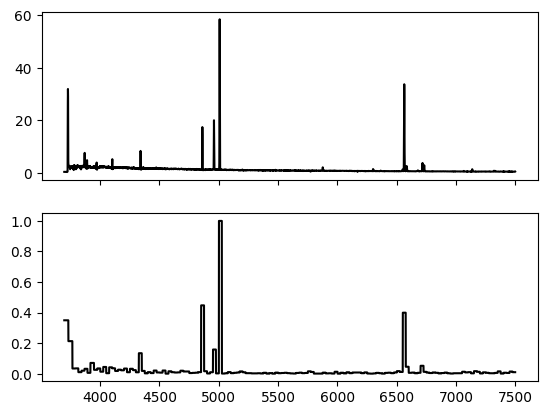

In [14]:
score_name = "mse_noRel100"
# explanation_run_id = "20250427190650_uniform_5000_scale"
explanation_run_id = "20250514144513_uniform_150_scale_0.9"


mse_weights = np.load(
    f"{explanations_dir}/{bin_id}/{score_name}/weights_{explanation_run_id}.npy",
    mmap_mode="r",
)

mse_spectra = np.load(
    f"{spectra_dir}/{bin_id}/{score_name}/top_anomalies.npy",
    mmap_mode="r"
)

anomalies_df = pd.read_csv(
    f"{spectra_dir}/{bin_id}/{score_name}/top_anomalies.csv.gz",
    index_col="specobjid",
)

# specobjid = 637325355518027776
specobjid = 3240467000396376064
idx = np.where(anomalies_df.index.values == specobjid)[0][0]

mse_weights = np.abs(mse_weights)
mse_weights /= np.max(mse_weights, axis=1, keepdims=True)

fig, axs = plt.subplots(2, 1, figsize=None, sharex=True)
axs[0].plot(wave, mse_spectra[idx, :], color="black")
axs[1].plot(wave, mse_weights[idx, :], color="black")

# MSE noRel 97

In [4]:
score_name = "mse_noRel97"
# explanation_run_id = "20250427151754_uniform_5000_scale"
explanation_run_id = "20250515092253_uniform_150_scale_0.9"
anomalies_df = pd.read_csv(
    f"{spectra_dir}/{bin_id}/{score_name}/top_anomalies.csv.gz",
    index_col="specobjid",
)

weights = ingest_explanations_into_array(
    specobjids_array=anomalies_df.index.values,
    wave=wave,
    load_from_dir=f"{explanations_dir}/{bin_id}/{score_name}/{explanation_run_id}",
)

np.save(
    f"{explanations_dir}/{bin_id}/{score_name}/weights_{explanation_run_id}.npy",
    weights,
)

# MSE 250kms noRel100

In [ ]:
score_name = "mse_filter_250kms_noRel100"
# explanation_run_id = "20250427094150_uniform_5000_scale"
# explanation_run_id = "20250507090310_uniform_188_scale_0.9"
# explanation_run_id = "20250513174721_uniform_110_scale_0.9"
explanation_run_id = "20250514214306_uniform_150_scale_0.9"

anomalies_df = pd.read_csv(
    f"{spectra_dir}/{bin_id}/{score_name}/top_anomalies.csv.gz",
    index_col="specobjid",
)

weights = ingest_explanations_into_array(
    specobjids_array=anomalies_df.index.values,
    wave=wave,
    load_from_dir=f"{explanations_dir}/{bin_id}/{score_name}/{explanation_run_id}",
)

np.save(
    f"{explanations_dir}/{bin_id}/{score_name}/weights_{explanation_run_id}.npy",
    weights,
)

# MSE 250kms noRel97

In [ ]:
score_name = "mse_filter_250kms_noRel97"
# explanation_run_id = "20250427105355_uniform_5000_scale"
# explanation_run_id = "20250513185644_uniform_110_scale_0.9"
explanation_run_id = "20250514105957_uniform_150_scale_0.9"
# explanation_run_id = ""

anomalies_df = pd.read_csv(
    f"{spectra_dir}/{bin_id}/{score_name}/top_anomalies.csv.gz",
    index_col="specobjid",
)

weights = ingest_explanations_into_array(
    specobjids_array=anomalies_df.index.values,
    wave=wave,
    load_from_dir=f"{explanations_dir}/{bin_id}/{score_name}/{explanation_run_id}",
)

np.save(
    f"{explanations_dir}/{bin_id}/{score_name}/weights_{explanation_run_id}.npy",
    weights,
)